In [60]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARM-KASTr/py/')
from extraction import *
from extraction_scripts import *

Loading in the files (mainly bias and flats)

In [61]:
import glob

import astropy.io.fits as fits

biaspath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/bias/"

flatpath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/flat/"

sciencepath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/science/"

arcpath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/arc/"

darkpath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/dark/"

BIAS = []

FLAT = []

SCIENCE = []

ARC = []

for filename in glob.glob(biaspath + '*.fits'):
    BIAS.append(fits.open(filename))

for filename in glob.glob(flatpath + '*.fits'):
    FLAT.append(fits.open(filename))

for filename in glob.glob(sciencepath + '*.fits'):
    SCIENCE.append(fits.open(filename))

for filename in glob.glob(arcpath + '*.fits'):
    ARC.append(fits.open(filename))

Making the median bias frame and the median flat frame.
Subtracting the bias from the flat, creating the mask, and normalizing the flat.

In [62]:
median_biasframe = cube_median(BIAS)

median_flatframe = cube_median(FLAT)

bias_subtracted_flat = bias_subtract(median_flatframe, median_biasframe)

image_mask = create_mask(bias_subtracted_flat, median_biasframe)

norm_flat = normalize_flat(bias_subtracted_flat, image_mask)

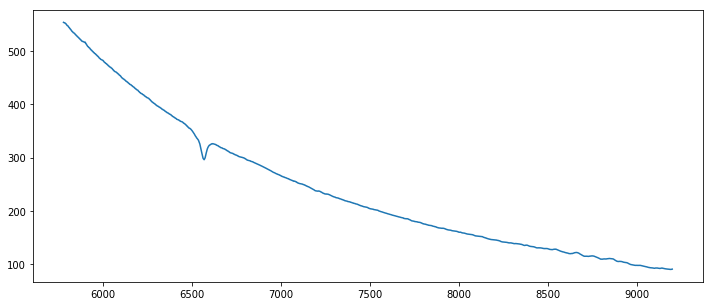

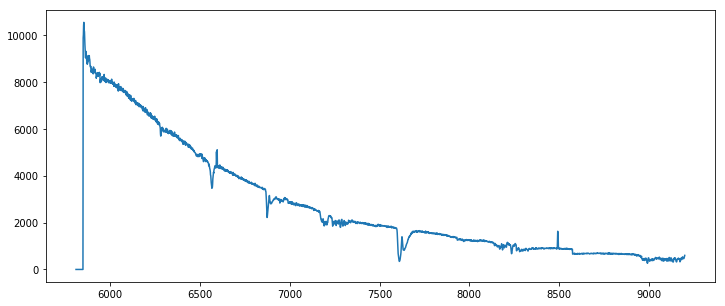

In [63]:
import pandas as pd

flxmod = "/home/ryan/projects/KASTr_data/Flux_Standards/ffeige67.dat"

flxpath = "/home/ryan/projects/data_prods/190401/flux_calibrator/FEIGE67 - Exposure 2.csv"

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt')
wavecal = np.poly1d(wavemod)

df = pd.read_csv( flxpath )

pixels = df.values[:, 0]

fluxes = df.values[:, 2]


df1 = np.loadtxt( flxmod)

flxwave = df1[:, 0]

flxflx = df1[:, 1]

waves = wavecal( pixels )


flxflx = flxflx[ flxwave>= 5780 ]
flxwave = flxwave[ flxwave >= 5780 ]

plt.figure(figsize=[12,5])
plt.plot(flxwave, flxflx)
plt.show()


fluxes = fluxes[ waves <= 9200]
waves = waves[ waves <= 9200]

plt.figure(figsize=[12,5])
plt.plot(waves, fluxes)
plt.show()

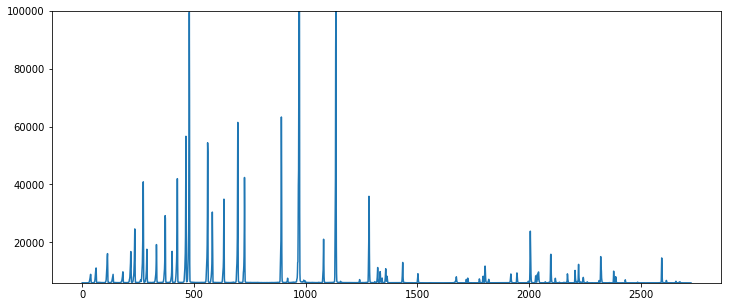

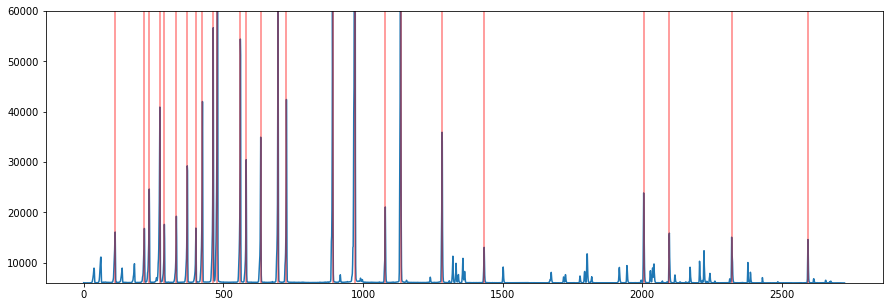

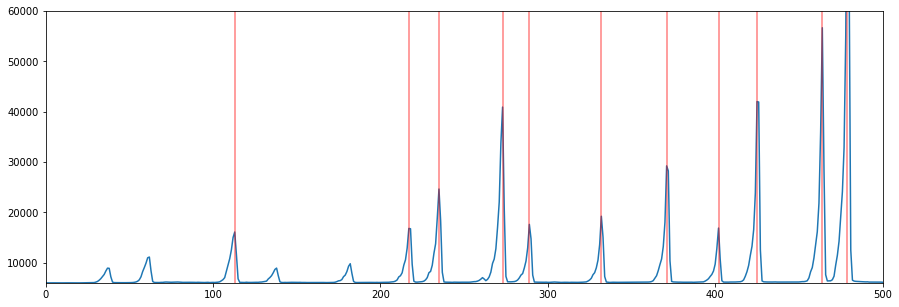

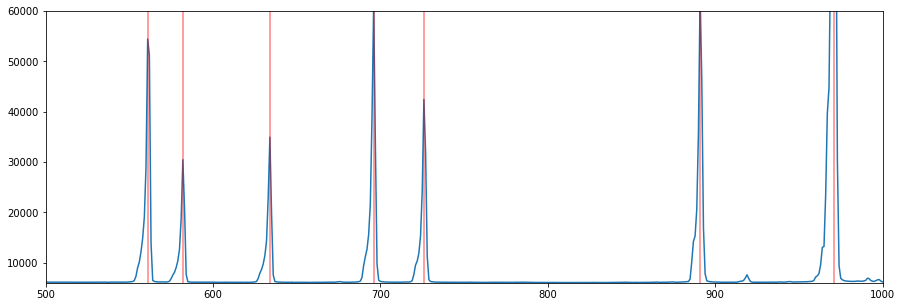

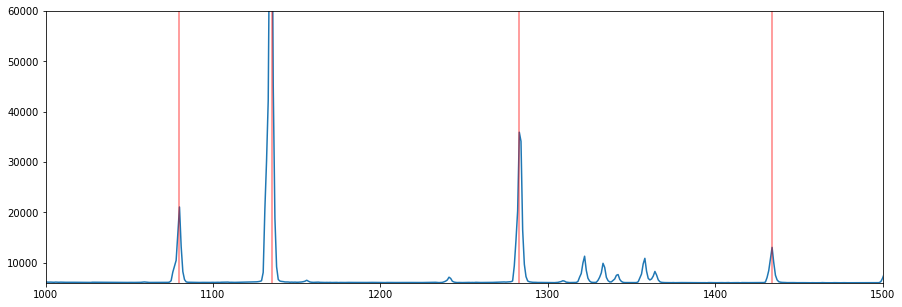

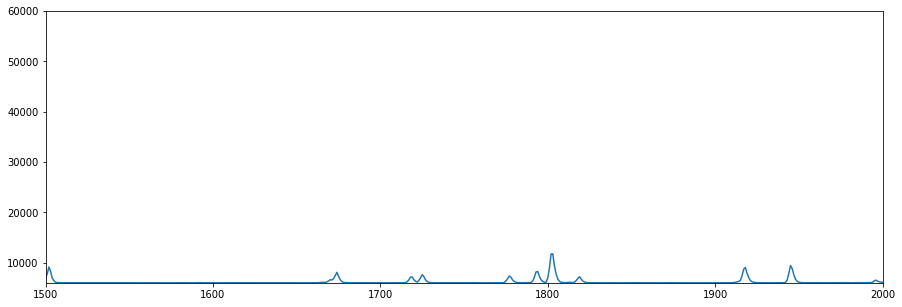

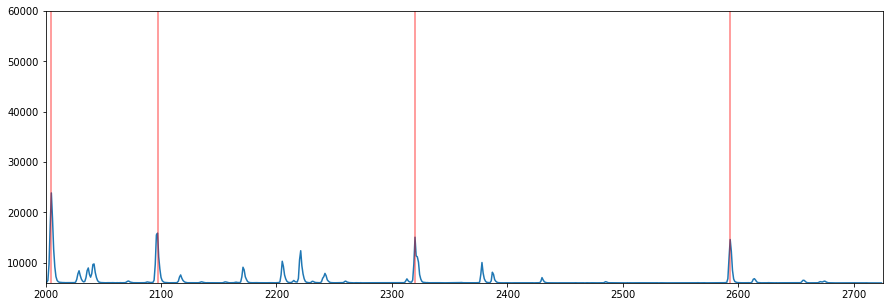

In [5]:
arcp = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/r1001.fits'

arcd = copy.deepcopy(fits.open(arcp)[0].data)

pfit = np.poly1d(stdpmod)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(np.around(pfit(i) - 3)):int(np.around(pfit(i) + 3))])

arc_flx = np.sum(arc_slc, axis=1)

plt.figure(figsize=[12,5])
plt.plot(arc_flx)
plt.ylim([6000, 100000])
plt.show()

local_max  = []

px_rad = 10

min_int = 0.06


for i, value in enumerate(arc_flx):
    
    if (i < px_rad) or (i > len(arc_flx) - px_rad - 1):
        continue
    
    if arc_flx[i] < np.amax(arc_flx) * min_int:
        continue
    
    flx_bin = arc_flx[i - px_rad : i + px_rad ]
    
    flx_bin = np.delete(flx_bin, px_rad)
    
    if (np.amax(flx_bin) >= arc_flx[i]):
        continue
    
    local_max.append(i)
    
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()


plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2000, len(arc_flx)])
plt.show()


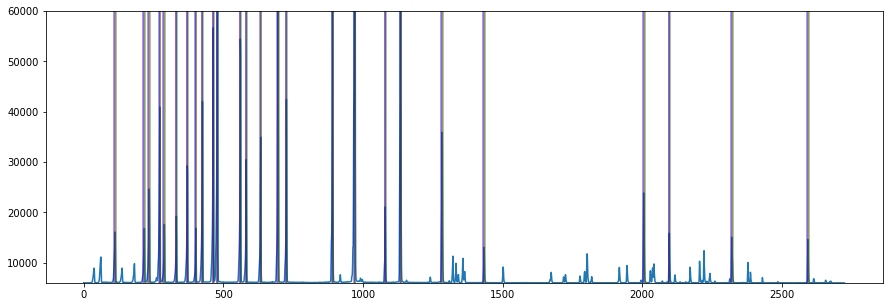

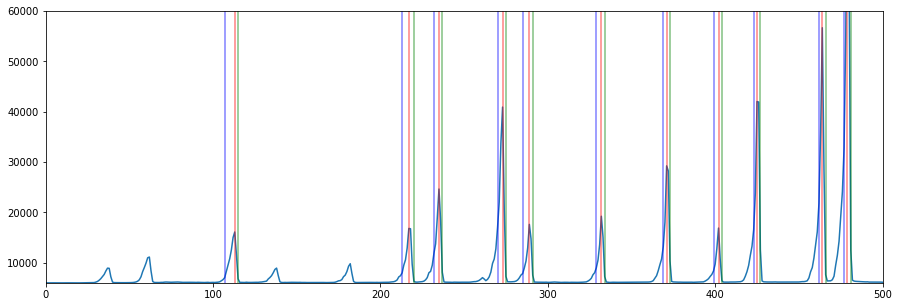

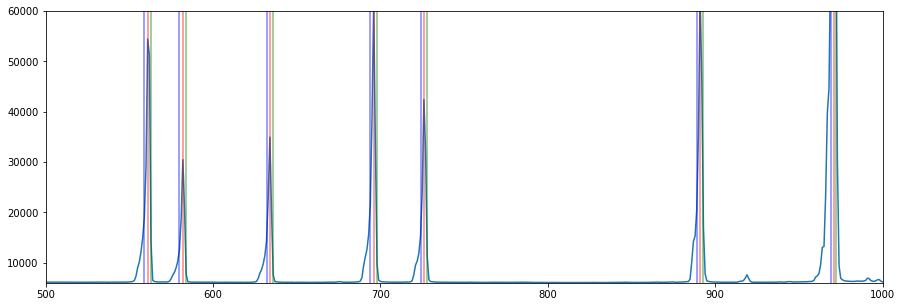

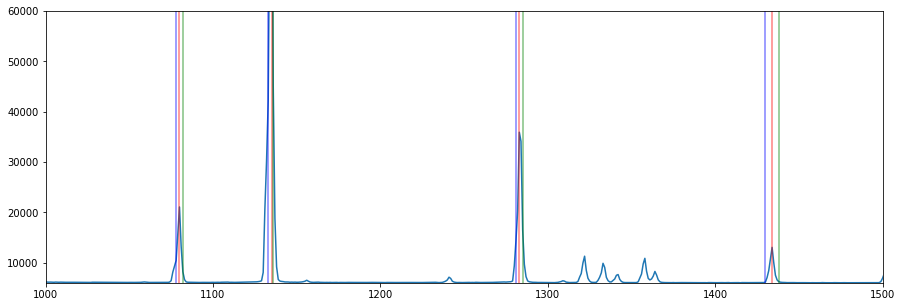

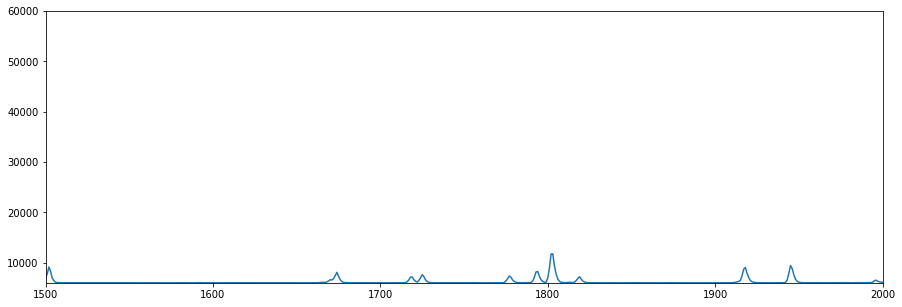

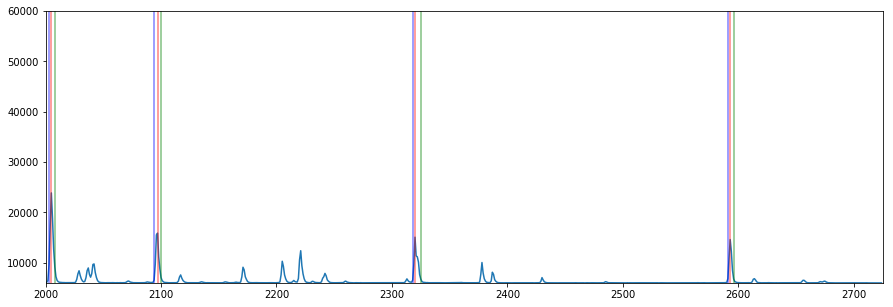

In [6]:
redge = []
ledge = []

positions = np.arange(len(arc_flx))

for i, lmax in enumerate(local_max):
    max_flx = arc_flx[ lmax ]
    
    half_flx = max_flx / 2.
    
    
    outside = arc_flx < half_flx
    
    left = max(positions[(positions < lmax) & outside])
    right = min( positions[ (positions>lmax) & outside])
    
    ledge.append(left)
    
    redge.append(right)
    
    
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2000, len(arc_flx)])
plt.show()

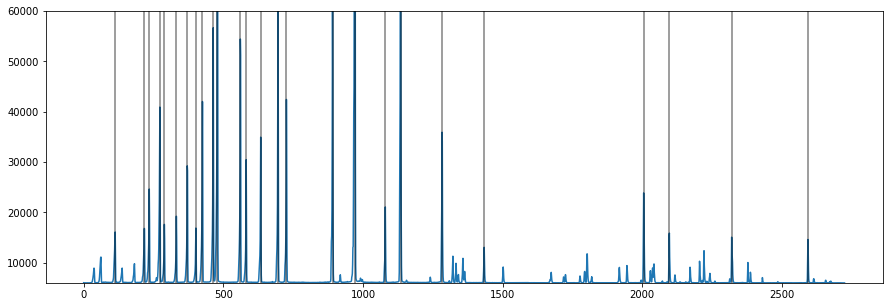

In [7]:
max_width = 50

cents = []

for i, lmax in enumerate(local_max):
    
    if (redge[i] - ledge[i] > max_width):
        continue
        
    inside = (positions >= ledge[i]) & (positions <= redge[i])
    
    centroid = np.sum( positions[inside] * arc_flx[inside] )/ np.sum( arc_flx[inside] )
    
    cents.append(centroid)
    
    
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()

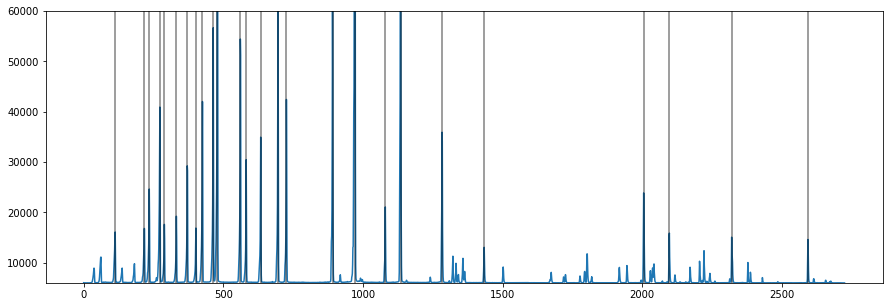

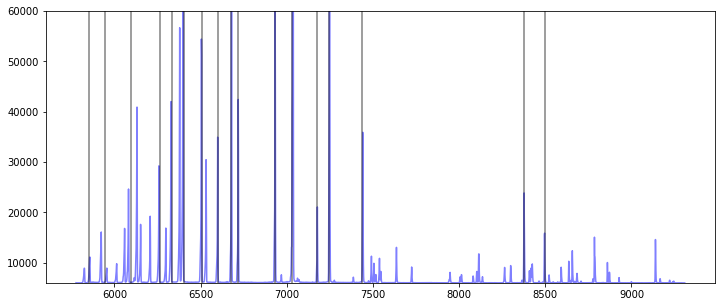

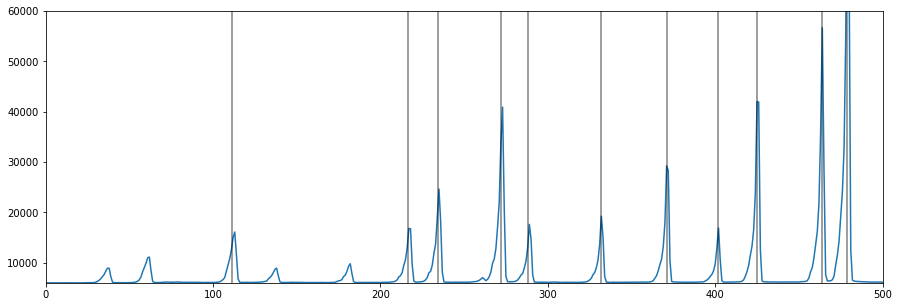

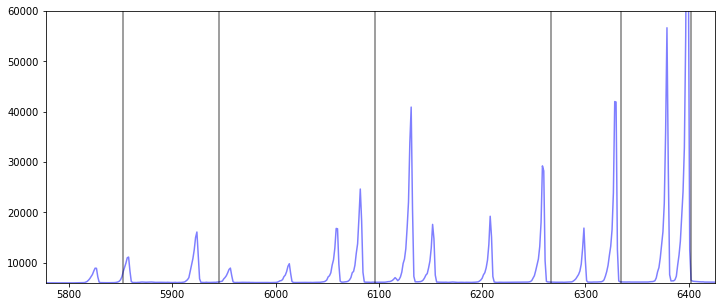

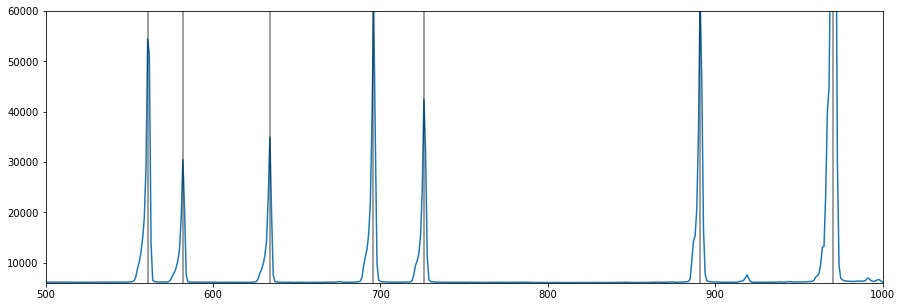

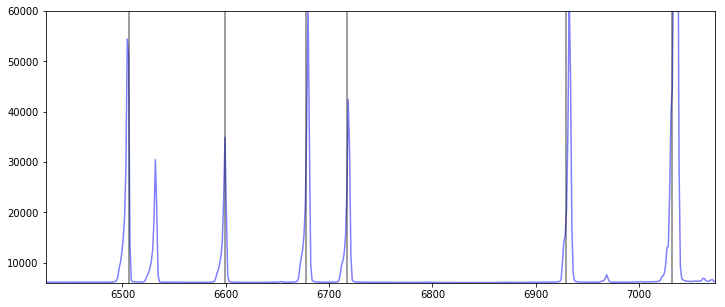

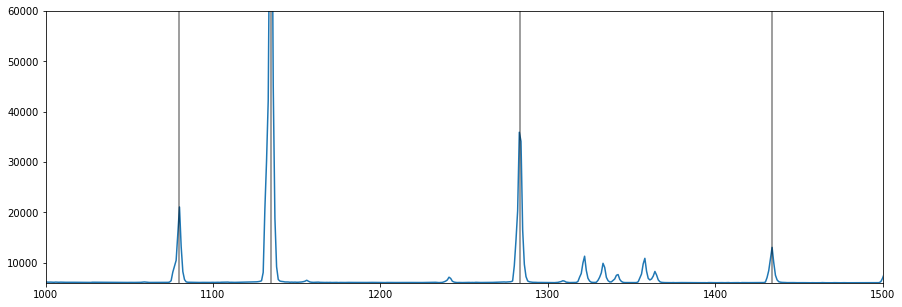

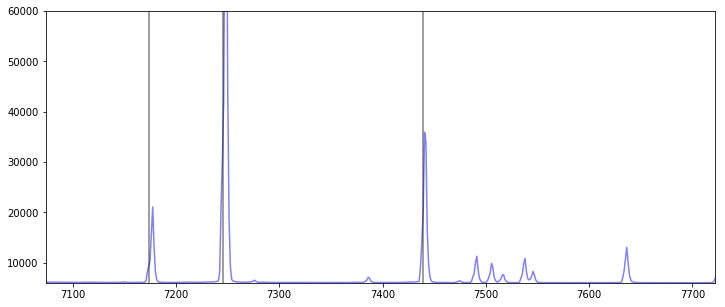

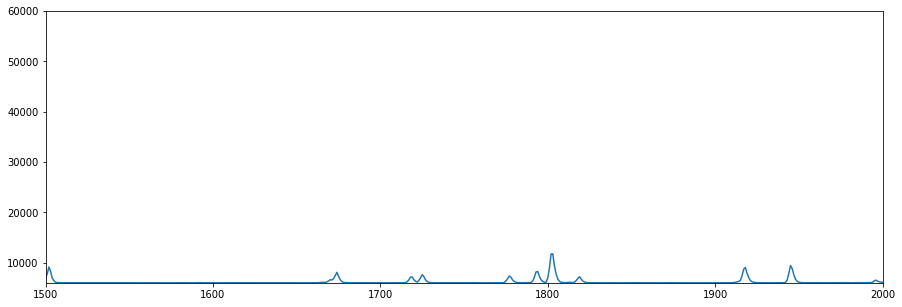

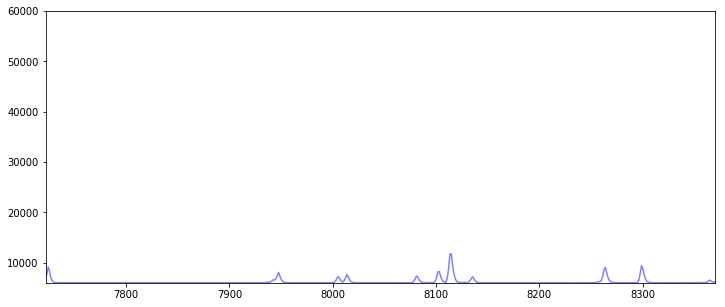

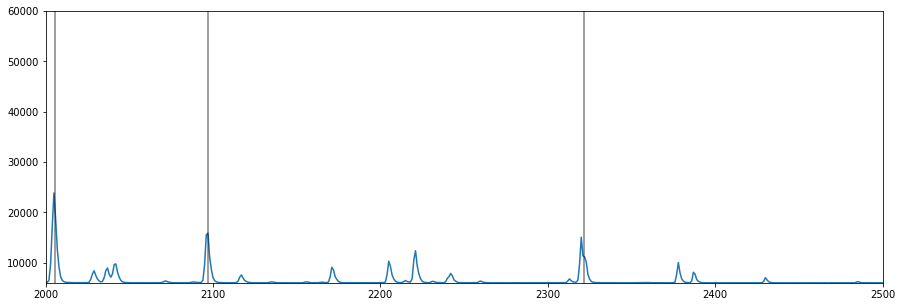

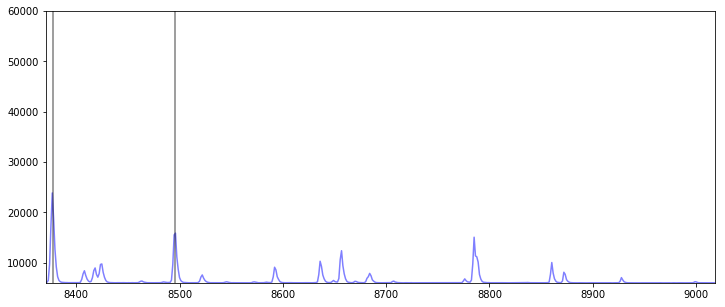

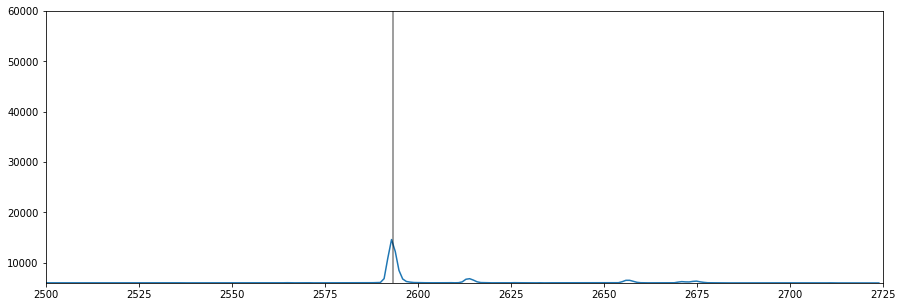

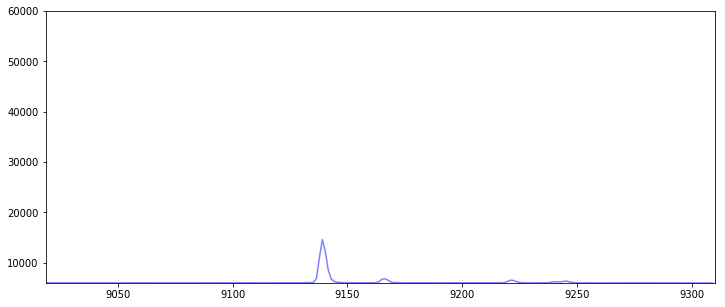

In [7]:
# DONT RUN EVAR
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
lines = [ 5852.49, 5944.83, 6096.16, 6266.50, 6334.40, 6402.25, 6506.53, 6598.95, 6678.2, 6717.04, 6929.47, 7032.41, 7173.94, 7245.17, 7438.90, 8377.61, 8495.36]
plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.show()


#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(0), wavecal(500)])
plt.show()



######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(500), wavecal(1000)])
plt.show()



#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(1000), wavecal(1500)])
plt.show()




#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(1500), wavecal(2000)])
plt.show()



#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2000, 2500])
plt.show()


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(2000), wavecal(2500)])
plt.show()


#########
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2500, len(arc_flx)])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(2500), wavecal(len(arc_flx))])
plt.show()

[5852.49, 5944.83, 6096.16, 6266.5, 6334.4, 6402.25, 6506.53, 6598.95, 6678.2, 6717.04, 6929.47, 7032.41, 7173.94, 7245.17, 7438.9, 8377.61, 8495.36, 6965.43, 7383.98, 7653.105, 7723.76, 7948.175, 8115.31, 8424.65, 8521.44, 9122.97, 9224.5]


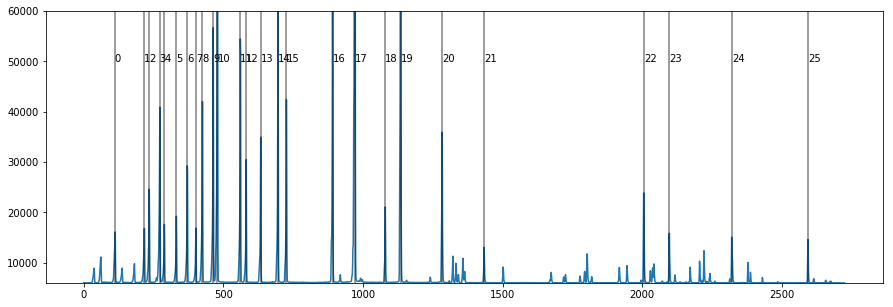

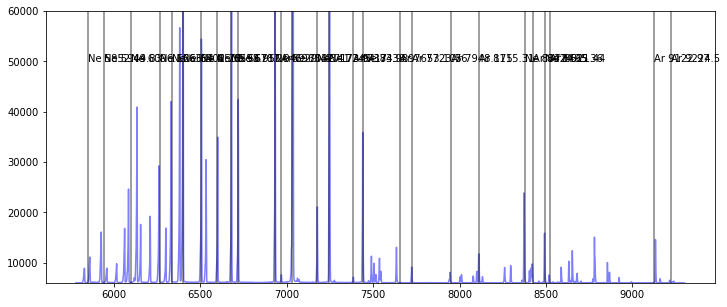

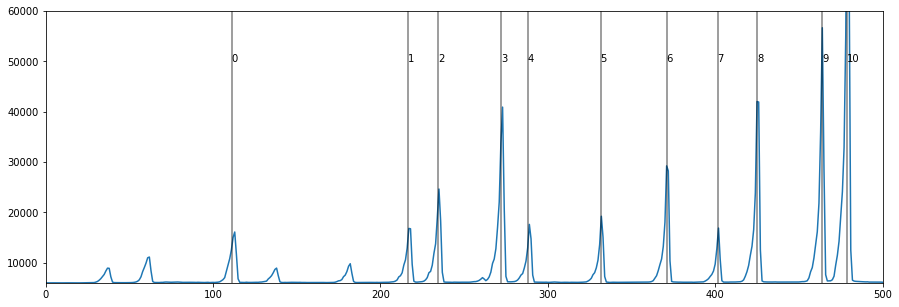

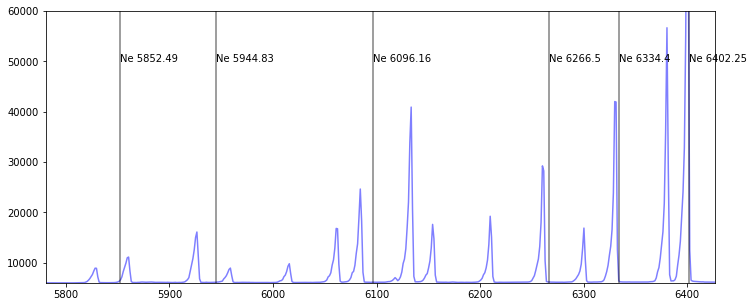

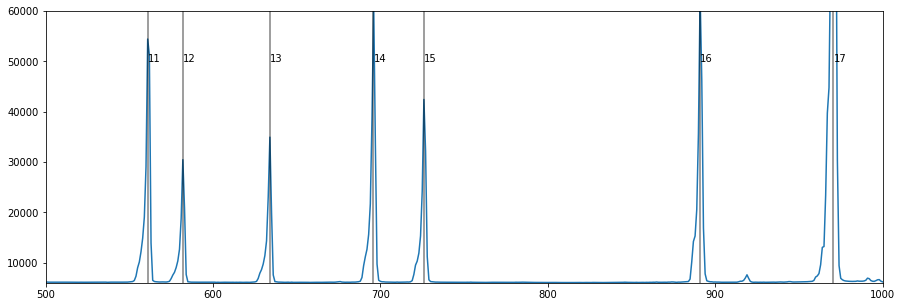

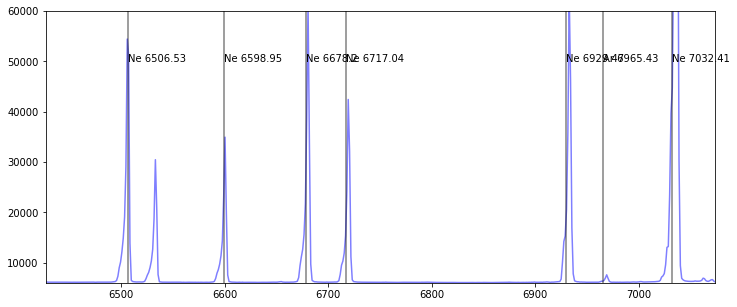

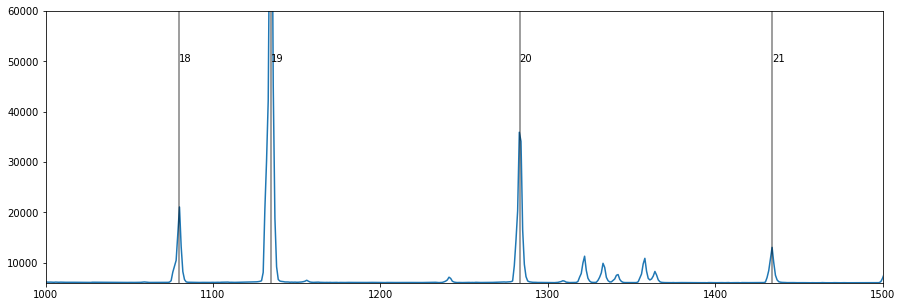

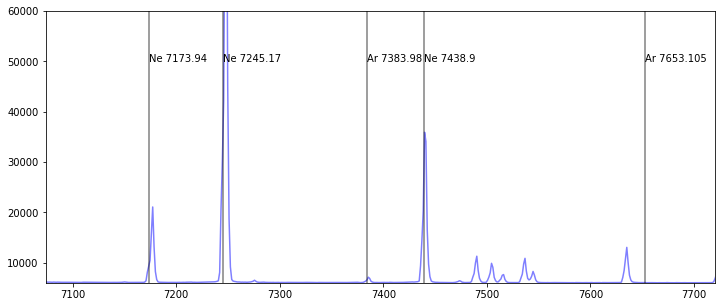

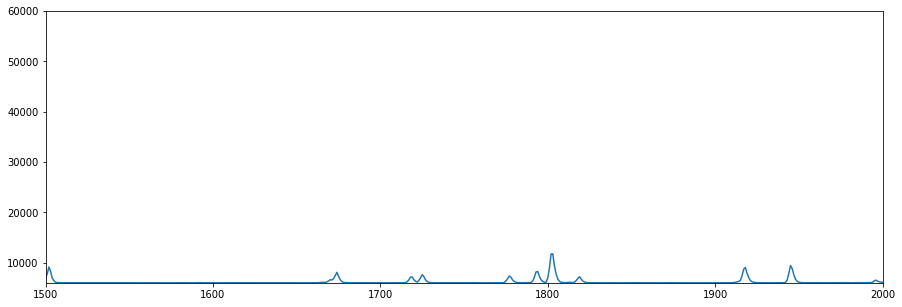

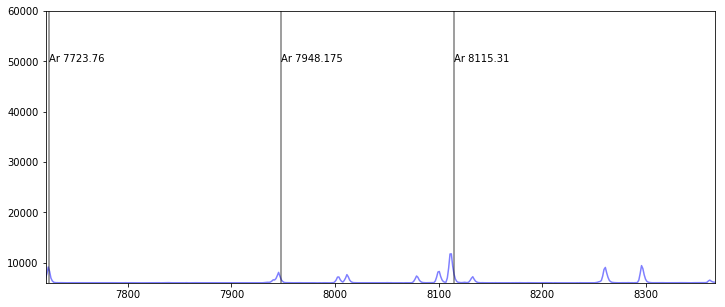

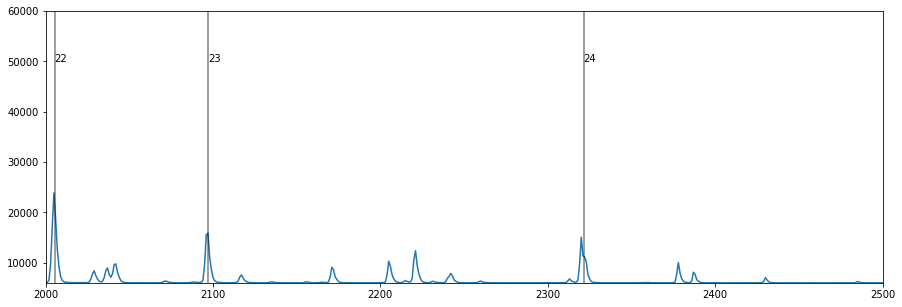

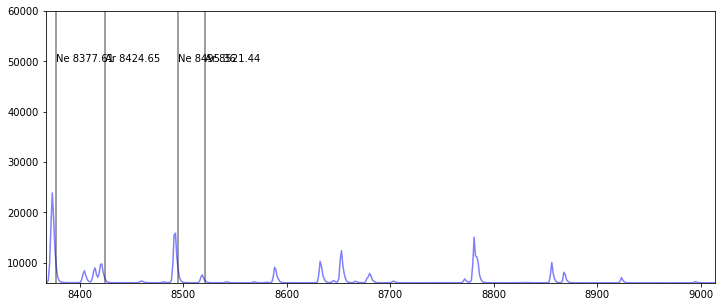

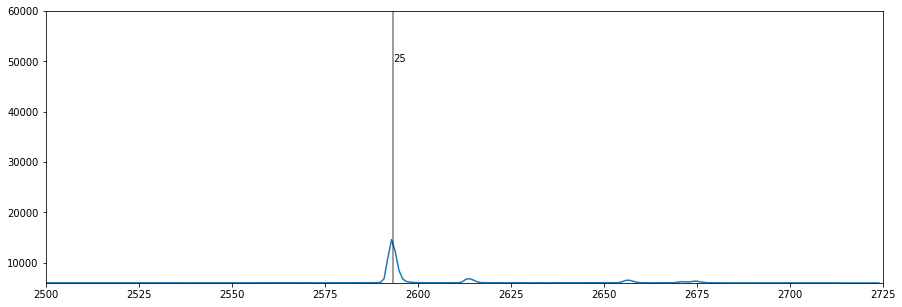

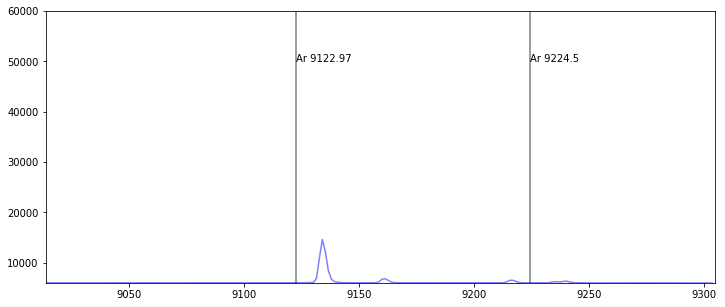

In [13]:
wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
NElines = [ 5852.49, 5944.83, 6096.16, 6266.50, 6334.40, 6402.25, 6506.53, 6598.95, 6678.2,
           6717.04, 6929.47, 7032.41, 7173.94, 7245.17, 7438.90, 8377.61, 8495.36]

ARlines = [6965.43, 7383.98, 7653.105, 7723.76, 7948.175, 8115.31, 8424.65, 8521.44, 9122.97, 9224.5]


lines = NElines + ARlines

print(lines)


plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ar ' + str( line ) )

plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid < 500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )
    
        
plt.xlim( [wavecal(0), wavecal(500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 500 and centroid < 1000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(500), wavecal(1000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1000 and centroid < 1500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1000), wavecal(1500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1500 and centroid < 2000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1500), wavecal(2000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2000 and centroid < 2500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2000, 2500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2000), wavecal(2500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2500 and centroid < len(arc_flx):
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2500, len(arc_flx)])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2500), wavecal(len(arc_flx))])
plt.show()

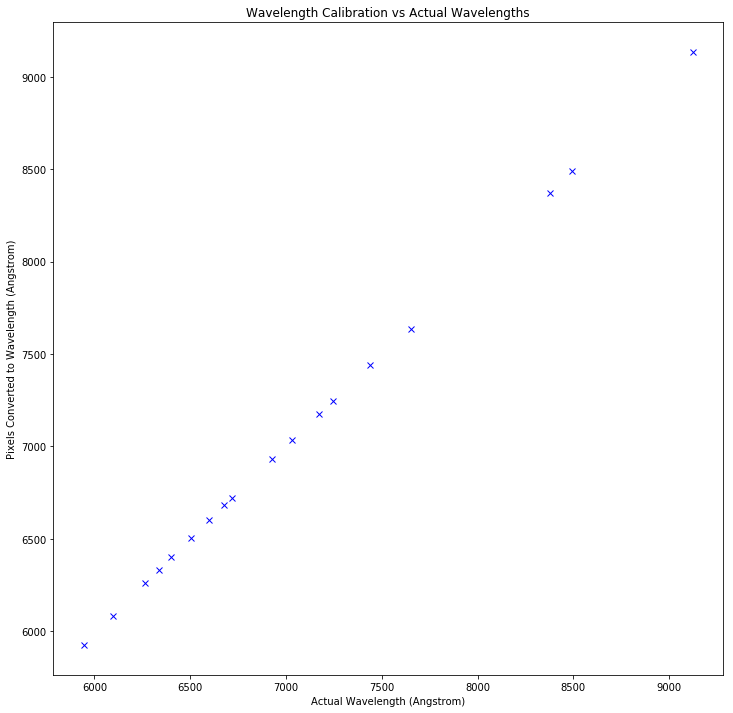

In [33]:
line = np.array([cents[0], cents[2], cents[6], cents[8],
                cents[10], cents[11], cents[13], cents[14], cents[15],
                cents[16], cents[17], cents[18], cents[19],
                cents[20], cents[22], cents[23], cents[25], cents[21]])

wv = np.array([5944.83, 6096.16, 6266.50,
              6334.40, 6402.25, 6506.53, 6598.95,
              6678.20, 6717.04, 6929.47, 7032.41,
              7173.94, 7245.17, 7438.9, 8377.61, 8495.36, 9122.97, 7653.107])

guesses = wavecal(line)

plt.figure(figsize=[12, 12])
plt.plot( wv, guesses,  'bx')

plt.xlabel('Actual Wavelength (Angstrom)')
plt.ylabel('Pixels Converted to Wavelength (Angstrom)')

plt.title('Wavelength Calibration vs Actual Wavelengths')

'''
plt.savefig('Calibration vs Actual.png')
'''

plt.show()

[ 111.27130536  234.50266333  371.04534491  425.07334906  478.8981438
  561.07057933  633.8312751   695.82594958  725.9971427   891.01805113
  970.61562411 1079.8950196  1134.54488699 1283.14822301 2005.38146674
 2096.93824078 2593.41595985 1433.95048354]
[5944.83  6096.16  6266.5   6334.4   6402.25  6506.53  6598.95  6678.2
 6717.04  6929.47  7032.41  7173.94  7245.17  7438.9   8377.61  8495.36
 9122.97  7653.107]


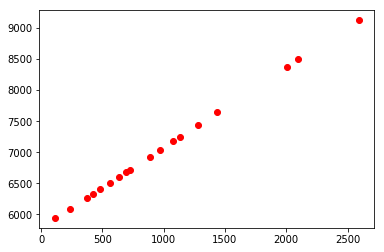

In [41]:
good_cents =[cents[0], cents[2], cents[6], cents[8],
                cents[10], cents[11], cents[13], cents[14], cents[15],
                cents[16], cents[17], cents[18], cents[19],
                cents[20], cents[22], cents[23], cents[25], cents[21]]

min_acc = 75

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
lines = np.array([5944.83, 6096.16, 6266.50,
              6334.40, 6402.25, 6506.53, 6598.95,
              6678.20, 6717.04, 6929.47, 7032.41,
              7173.94, 7245.17, 7438.9, 8377.61, 8495.36, 9122.97, 7653.107])


px_pos = np.array(good_cents)

wave_guess = wavecal( px_pos )

wave_ref = np.zeros(len(px_pos))

for i, guess in enumerate(wave_guess):
    
    dev = np.abs( guess - lines )
    
    min_dev = np.min(dev)
    
    if np.abs(min_dev) > min_acc:
        continue
        
    wave_ref[i] = lines[ dev == min_dev ]
    
    
px_pos = px_pos[ wave_ref != 0 ]


print(px_pos)

wave_ref = wave_ref[ wave_ref != 0 ]


print(wave_ref)

plt.plot( px_pos, wave_ref, 'ro')
plt.show()

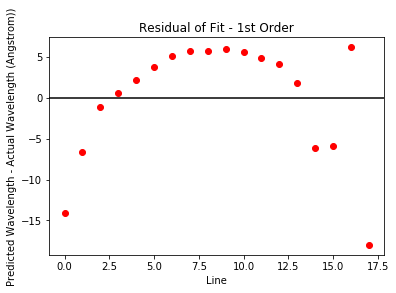

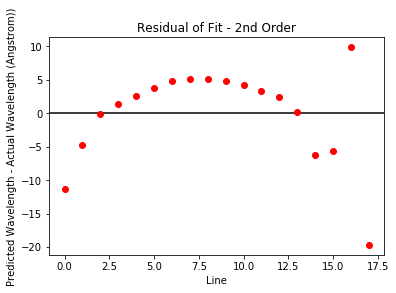

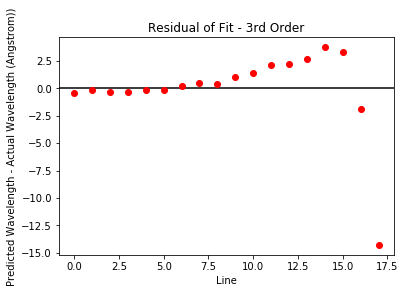

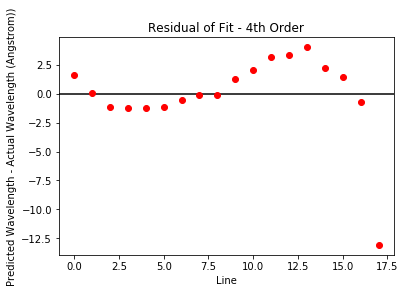

In [59]:
ref_wavemod = np.polyfit(px_pos, wave_ref, 1)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)

plt.axhline(color='k')
plt.plot( ref_wavecal(px_pos) - wave_ref, 'ro')

plt.title('Residual of Fit - 1st Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Line")


plt.savefig('LinearWavecal.png')


plt.show()

ref_wavemod = np.polyfit(px_pos, wave_ref, 2)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)

plt.axhline(color='k')
plt.plot( ref_wavecal(px_pos) - wave_ref, 'ro')

plt.title('Residual of Fit - 2nd Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Line")


plt.savefig('QuadraticWavecal.png')


plt.show()
ref_wavemod = np.polyfit(px_pos, wave_ref, 3)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)

plt.axhline(color='k')
plt.plot( ref_wavecal(px_pos) - wave_ref, 'ro')

plt.title('Residual of Fit - 3rd Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Line")


plt.savefig('CubicWavecal.png')


plt.show()
ref_wavemod = np.polyfit(px_pos, wave_ref, 4)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)

plt.axhline(color='k')
plt.plot( ref_wavecal(px_pos) - wave_ref, 'ro')

plt.title('Residual of Fit - 4th Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Line")


plt.savefig('QuarticWavecal.png')


plt.show()

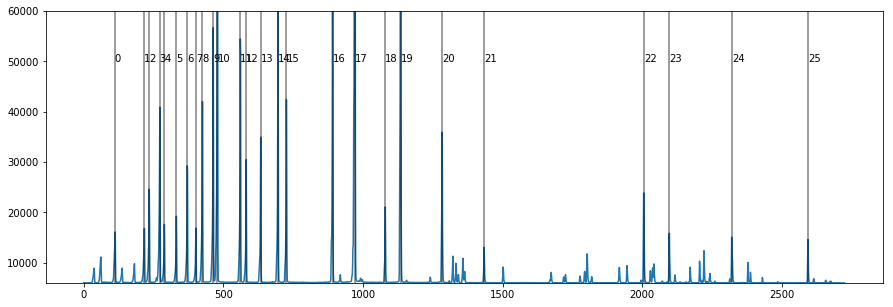

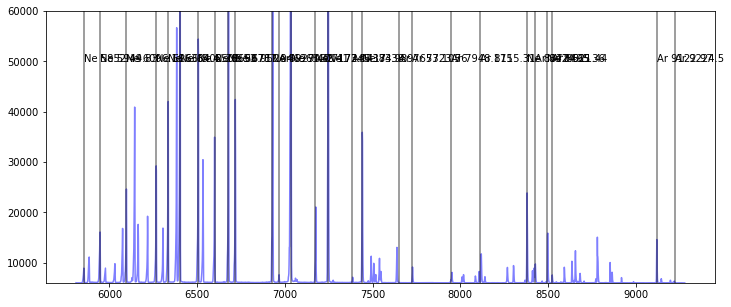

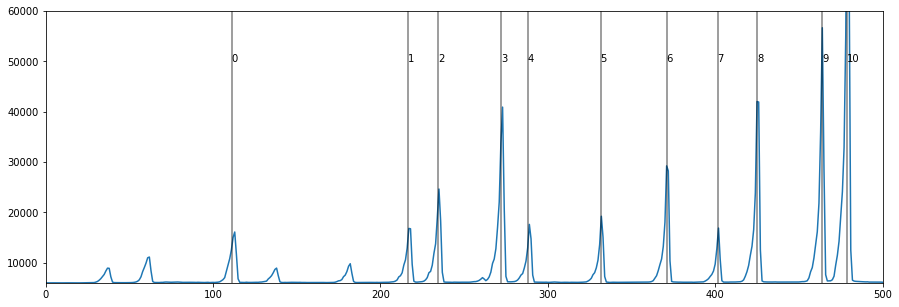

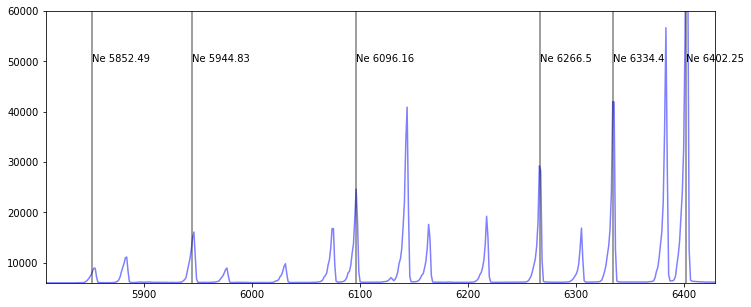

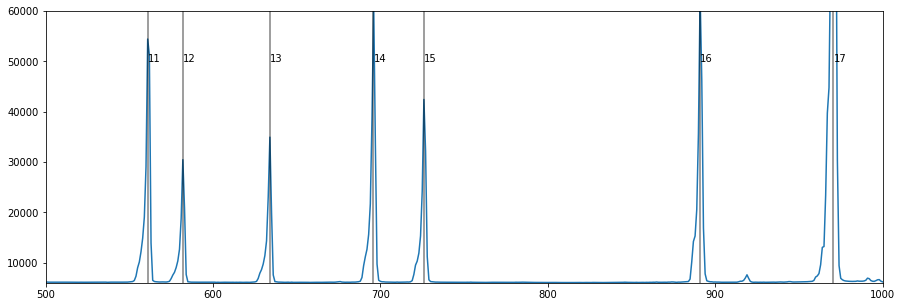

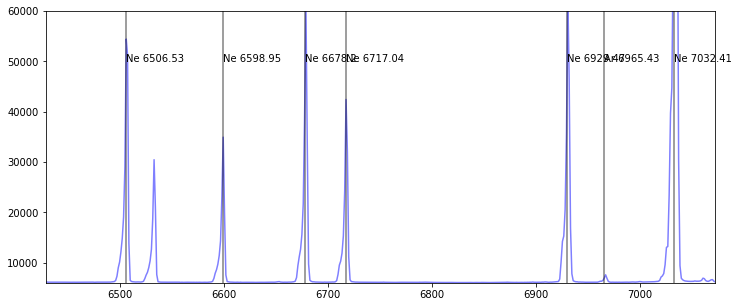

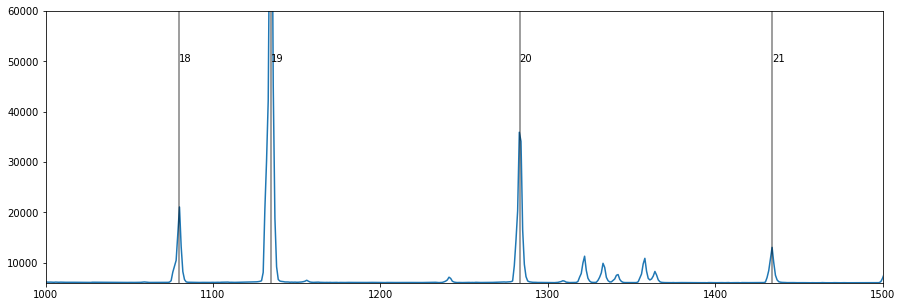

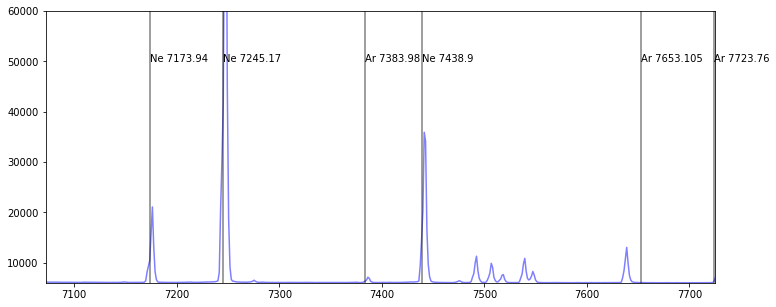

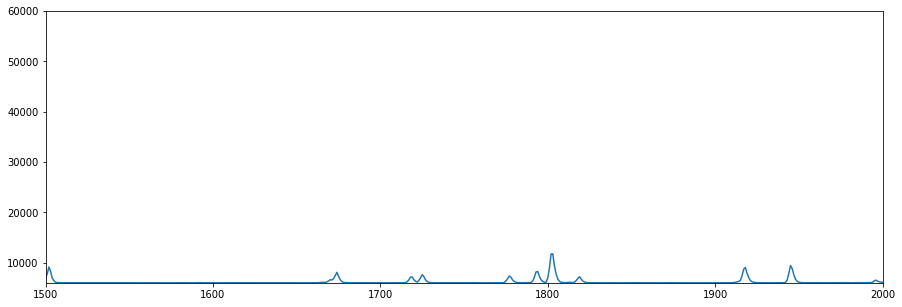

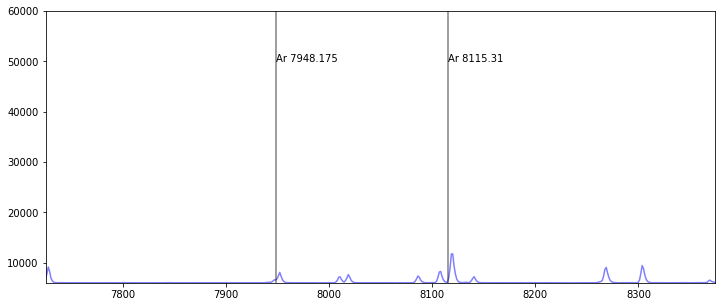

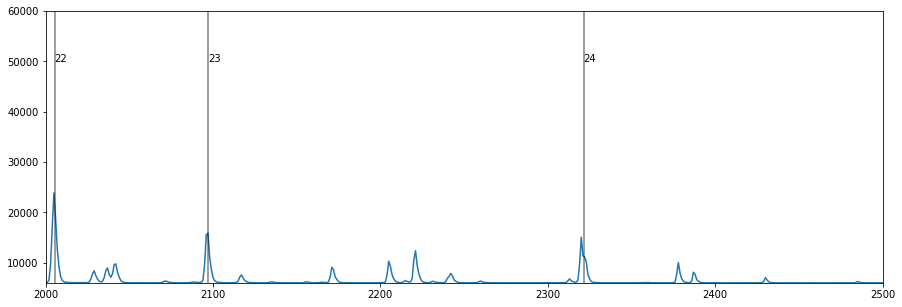

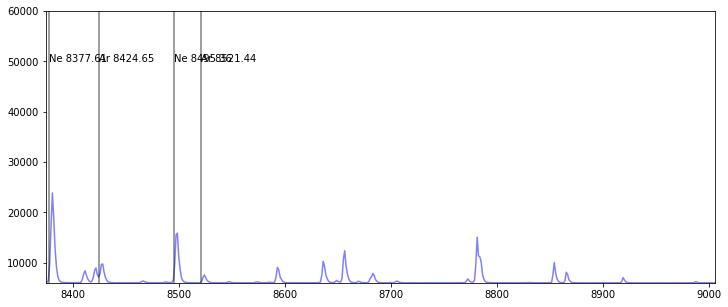

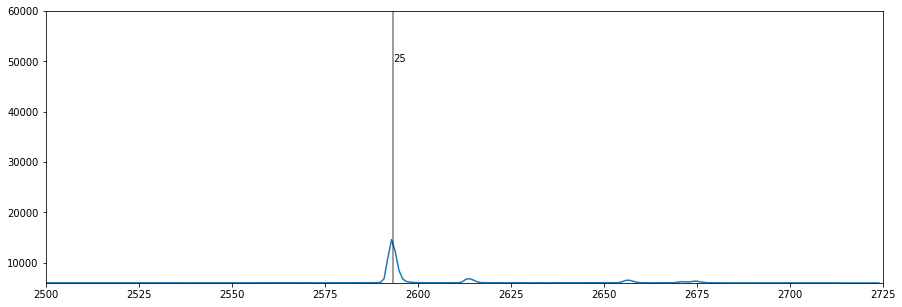

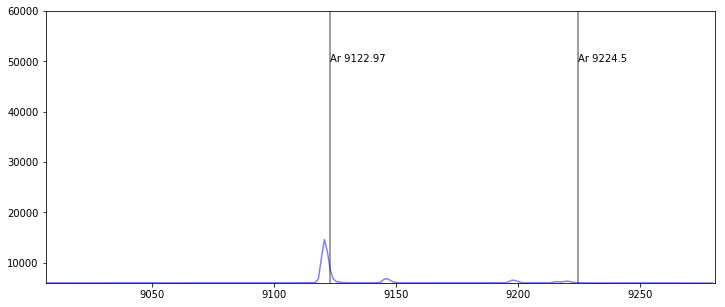

In [51]:
wavecal = ref_wavecal
pxrange = range(len(arc_slc))


plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ar ' + str( line ) )

plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid < 500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )
    
        
plt.xlim( [wavecal(0), wavecal(500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 500 and centroid < 1000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(500), wavecal(1000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1000 and centroid < 1500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1000), wavecal(1500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1500 and centroid < 2000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1500), wavecal(2000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2000 and centroid < 2500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2000, 2500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2000), wavecal(2500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2500 and centroid < len(arc_flx):
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2500, len(arc_flx)])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2500), wavecal(len(arc_flx))])
plt.show()

Reduction Ho!
Loaded image
Subtracted Bias
Calculated Variance
Flat Field Corrected the image
Flat Field Corrected the variance
Masked the image
Masked the variance
Created the slit trace
Generated Centered Image Slices
Generated Centered Variance SLices
Created spatial profile


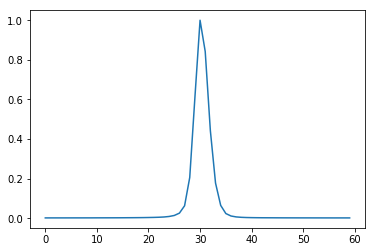

Reduction Continue!
Subtracted the background from image
Subtracted the background from variance
Generated the spectral weighting function
Extracted the spectrum
Extracted the variance


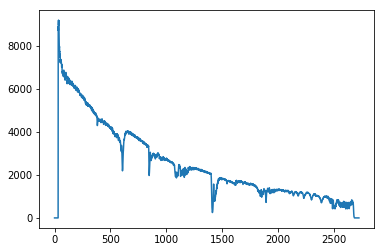

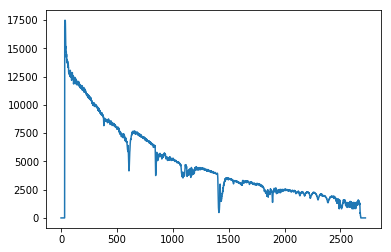

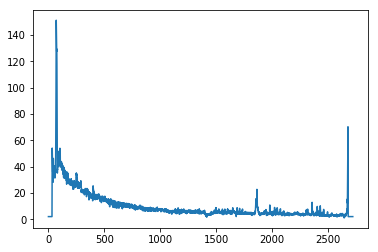

In [4]:
stdpath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/telluric/r1081.fits'

stdim = fits.open(stdpath)

std_slcs, std_varslcs, stdpmod, std_prof = reduce_standard_first_stage(stdim, median_biasframe, norm_flat, image_mask, 30)

plt.plot(std_prof)
plt.show()

stdspec, stdvar, std_bspec = reduce_second_stage(std_slcs, std_varslcs, std_prof, 0.1)

plt.plot(stdspec)
plt.show()

plt.plot(stdvar)
plt.show()

plt.plot(std_bspec)
plt.show()

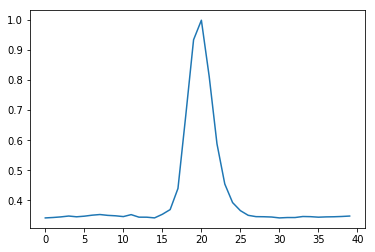

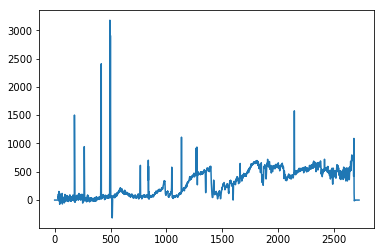

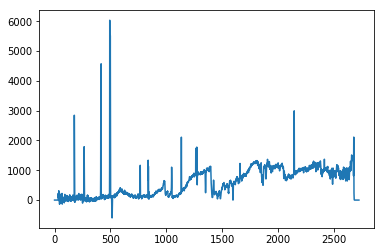

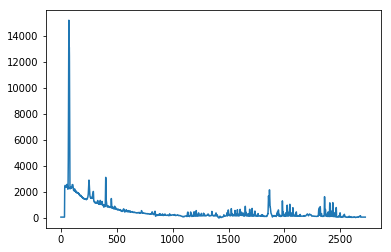

In [5]:
scipath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/science/r1078.fits'

sciim = fits.open(scipath)

sci_slcs, scivar_slcs, sci_prof = reduce_science_first_stage(sciim, median_biasframe, norm_flat, image_mask, 20, stdpfit, stdpmod)

plt.plot(sci_prof)
plt.show()

scispect, scivar, sci_bkg = reduce_second_stage(sci_slcs, scivar_slcs, sci_prof, 0.4)

plt.plot(scispect)
plt.show()

plt.plot(scivar)
plt.show()

plt.plot(sci_bkg)
plt.show()

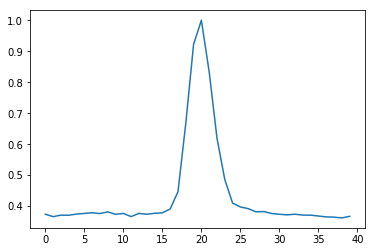

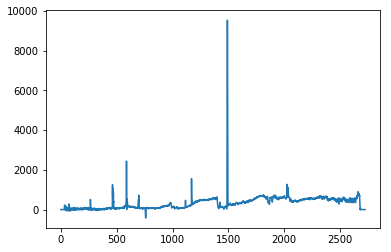

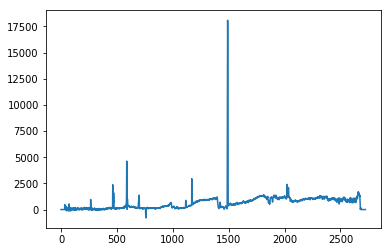

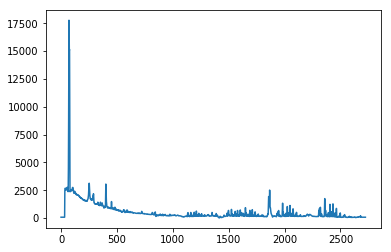

In [6]:
scipath2 = '/home/ryan/projects/KASTr_data/raw/1April2019/red/science/r1079.fits'

sciim2 = fits.open(scipath2)

sci_slcs2, scivar_slcs2, sci_prof2 = reduce_science_first_stage(sciim2, median_biasframe, norm_flat, image_mask, 20, stdpfit, stdpmod)

plt.plot(sci_prof2)
plt.show()

scispect2, scivar2, sci_bkg2 = reduce_second_stage(sci_slcs2, scivar_slcs2, sci_prof2, 0.5)

plt.plot(scispect2)
plt.show()

plt.plot(scivar2)
plt.show()

plt.plot(sci_bkg2)
plt.show()

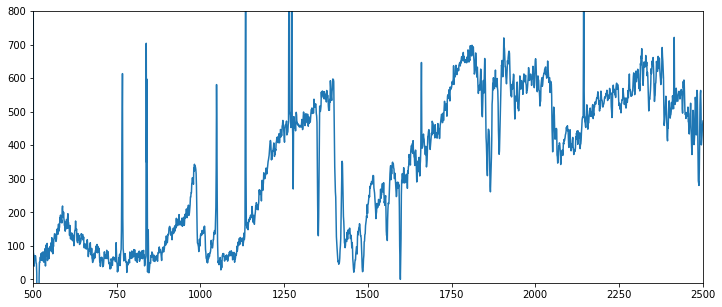

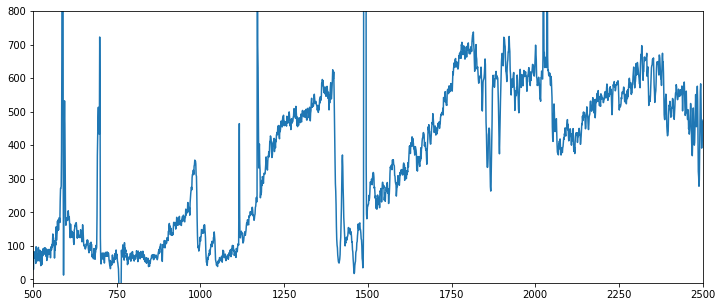

In [7]:
plt.figure(figsize=[12,5])
plt.plot(scispect)
plt.xlim([500,2500])
plt.ylim([-10,800])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(scispect2)
plt.xlim([500,2500])
plt.ylim([-10,800])
plt.show()

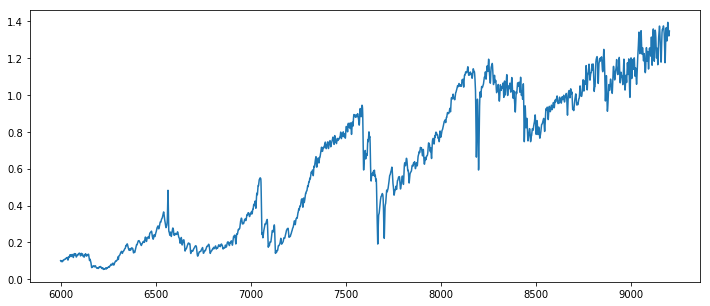

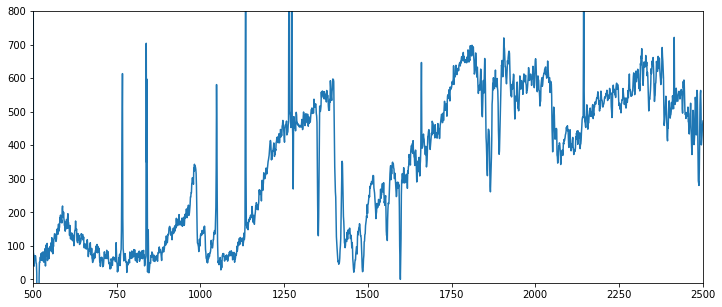

In [8]:
Dstandard = np.loadtxt('/home/ryan/projects/KASTr_data/DStandards/stds/M6_all.txt')
plt.figure(figsize=[12,5])
plt.plot(Dstandard[:, 0], Dstandard[:, 1])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(scispect)
plt.xlim([500,2500])
plt.ylim([-10,800])
plt.show()

In [9]:
wavelengths = Dstandard[:, 0]
fluxes = Dstandard[:, 1]

print( np.argmax(fluxes[4500:5500]) )

stdpeak1_ix = 4500 + 912

print(np.argmax(scispect[550:600]))

objpeak1_px = 550 + 38

print(np.where(wavelengths == 7000))

print(np.argmax(fluxes[9800:11000]))

stdpeak2_ix = 690 + 9800

print(np.argmax(scispect[900:1000]))

objpeak2_px = 82 + 900

print(np.where(wavelengths == 7500))

print(np.argmax(fluxes[14000:16000]))

stdpeak3_ix = 14000 + 1842

print(np.argmax(scispect[1300:1400]))

objpeak3_px = 1300 + 95

print(np.where(wavelengths == 8100))

#plt.plot(wavelengths[20000:25000], fluxes[20000:25000])
#plt.show()

print(np.argmax(fluxes[20000:25000]))

stdpeak4_ix = 2497 + 20000

#plt.plot(scispect[1700:2000])
#plt.show()

print(np.argmax(scispect[1700:2000]))

objpeak4_px = 206 + 1700

STDP = [wavelengths[stdpeak1_ix], wavelengths[stdpeak2_ix], wavelengths[stdpeak3_ix], wavelengths[stdpeak4_ix]]

OBJP = [objpeak1_px, objpeak2_px, objpeak3_px, objpeak4_px]

wavemodel = np.polyfit(OBJP, STDP, 1)

wavecal = np.poly1d(wavemodel)

912
38
(array([9999]),)
690
82
(array([14999]),)
1842
95
(array([20999]),)
2497
206


In [18]:
import pandas as pd

wcalex = pd.DataFrame(wavemodel)

wcalex.to_csv('master_wavecal.txt', index=False, header=False)

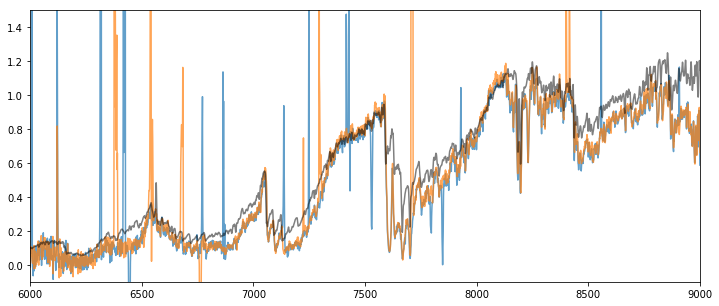

In [22]:
nwavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')

nwavecal = np.poly1d(nwavemod)

pxrange = range(len(scispect))

n_spec = scispect / (scispect[objpeak4_px] - 100)

n_spec2 = scispect2 / (scispect2[objpeak4_px] - 100)

plt.figure(figsize=[12,5])
plt.plot(nwavecal(pxrange), n_spec, alpha = 0.7)
plt.plot(nwavecal(pxrange), n_spec2, alpha = 0.7)
plt.xlim([6000, 9000])
plt.ylim([-0.1, 1.5])

plt.plot(wavelengths, fluxes, color = 'k', alpha=0.5)
plt.xlim([6000, 9000])
plt.show()

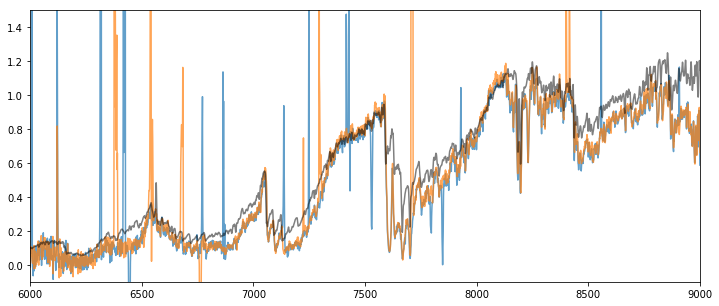

In [10]:
pxrange = range(len(scispect))

n_spec = scispect / (scispect[objpeak4_px] - 100)

n_spec2 = scispect2 / (scispect2[objpeak4_px] - 100)


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), n_spec, alpha = 0.7)
plt.plot(wavecal(pxrange), n_spec2, alpha = 0.7)
plt.xlim([6000, 9000])
plt.ylim([-0.1, 1.5])

plt.plot(wavelengths, fluxes, color = 'k', alpha=0.5)
plt.xlim([6000, 9000])
plt.show()

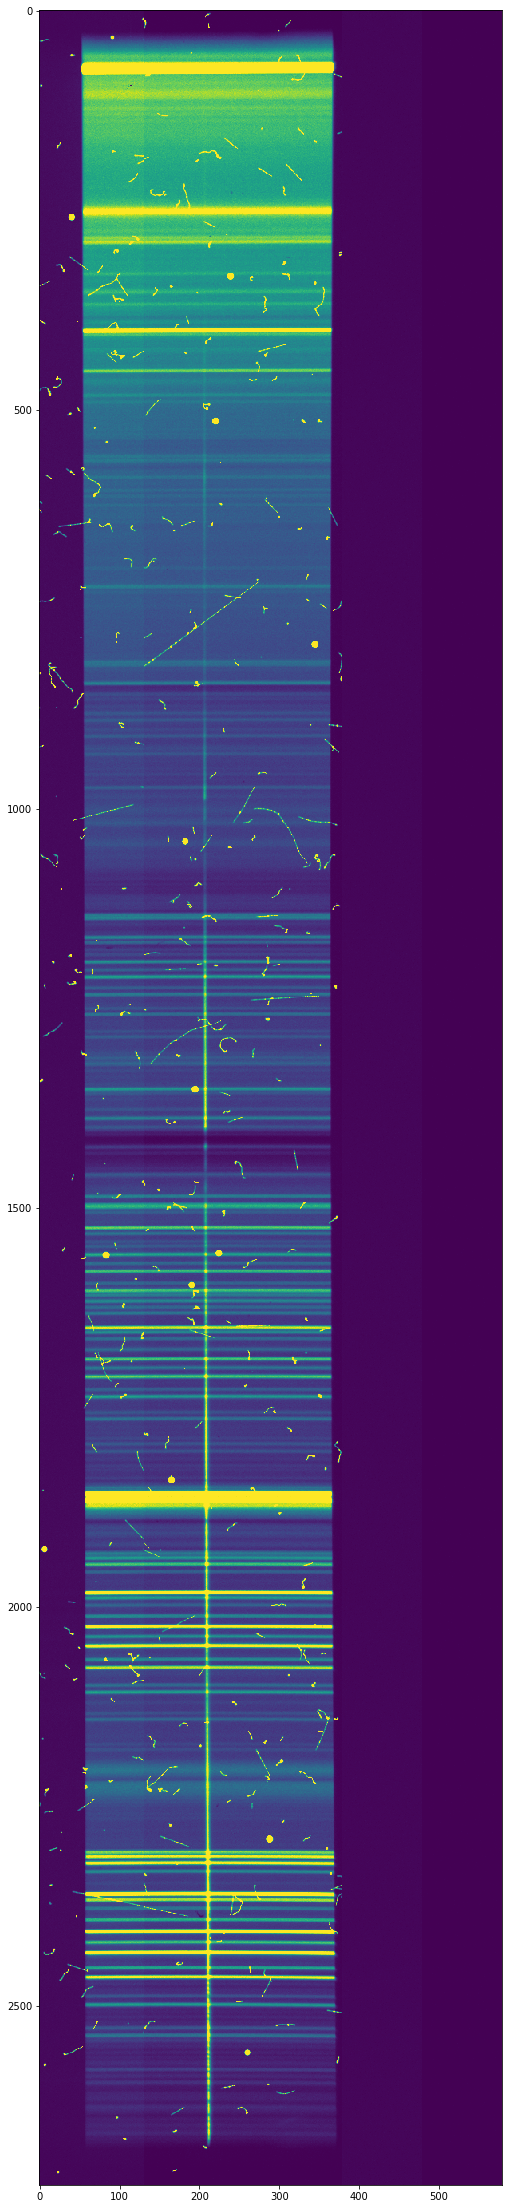

In [20]:
plt.figure(figsize=[10,40])
plt.imshow(fits.open(scipath)[0].data,vmin=1000,vmax=2000)

In [ ]:
arcp = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/r1001.fits'

arcd = copy.deepcopy(fits.open(arcp)[0].data)

pfit = np.poly1d(stdpmod)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(np.around(pfit(i) - 3)):int(np.around(pfit(i) + 3))])

plt.figure(figsize=[12,5])
plt.plot(np.sum(arc_slc, axis=1))
plt.xlim([0, 1600])
plt.ylim([6000, 100000])
plt.xlabel('Pixel')
plt.ylabel('Flux (DN)')
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 0-1600 px')

'''
plt.savefig('Arc_Lamp_spec_0-1600.png', type='png')

'''

plt.show()

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_slc)
plt.xlabel('Wavelength (Angstrom)')
plt.xlim([wavecal(0), wavecal(1600)])
plt.ylim([1000, 15000])
plt.ylabel('Flux (DN)')
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 0-1600 px using Estimated Wavecal')

'''
plt.savefig('Arc_Lamp_spec_0-1600_wavecaled.png', type='png')
'''

plt.show()

arcp = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/r1002.fits'

arcd = copy.deepcopy(fits.open(arcp)[0].data)

pfit = np.poly1d(stdpmod)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(np.around(pfit(i) - 3)):int(np.around(pfit(i) + 3))])

plt.figure(figsize=[12,5])
plt.plot(np.sum(arc_slc, axis=1))
plt.xlim([1600, len(arc_slc)])
plt.xlabel('Pixel')
plt.ylabel('Flux (DN)')
plt.ylim([6000, 170000])
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 1600-2725 px')

'''
plt.savefig('Arc_Lamp_spec_1600-2725.png', type='png')
'''

plt.show()

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_slc)
plt.xlabel('Wavelength (Angstrom)')
plt.xlim([wavecal(1600), wavecal(len(arc_slc))])
plt.ylabel('Flux (DN)')
plt.ylim([1000, 30000])
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 1600-2725 px using Estimated Wavecal')

'''
plt.savefig('Arc_Lamp_spec_1600-2725_wavecaled.png', type='png')
'''

plt.show()

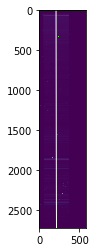

In [11]:
sci_im = copy.deepcopy(fits.open(scipath)[0].data)
xrange = range(len(sci_im[:,0]))
fig, ax = plt.subplots()
ax.imshow(sci_im)
ax.plot(stdpfit(xrange), xrange, color = 'w', linewidth=1)

In [7]:
def reduce_science_first_stage(image_path, bias_frame, normalized_flat, mask, px_thresh, poly_slit_trace, poly_slit_model):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    poly_shift = slit_fit_shift(image_slices, poly_slit_model, px_thresh)
    
    shifted_poly = slit_fit_trace(poly_shift)
    
    centered_slices = gen_cent_slc(masked_image, shifted_poly, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, shifted_poly, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(centered_slices)
    
    return centered_slices, variance_slices, spatial_profile

In [5]:
def reduce_second_stage(image_slices, variance_slices, spatial_profile, bkg_percent_thresh):
    
    bsubtracted_image_slices, background_spec = background_subtract(image_slices, spatial_profile, bkg_percent_thresh)
    
    bsubtracted_variance_slices, vbackground_spec = background_subtract(variance_slices, spatial_profile, bkg_percent_thresh)
    
    extraction_weight = weight_function(bsubtracted_image_slices)
    
    spect = extract_spectrum(bsubtracted_image_slices, extraction_weight)
    
    variance = extract_variance(bsubtracted_variance_slices, extraction_weight)
    
    return spect, variance, background_spec

In [4]:
def reduce_standard_first_stage(image_path, bias_frame, normalized_flat, mask, px_thresh):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    poly_slit_model = slit_fit_model(masked_image)
    
    poly_slit_trace = slit_fit_trace(poly_slit_model)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, poly_slit_trace, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(image_slices)
    
    return image_slices, variance_slices, poly_slit_model, poly_slit_trace, spatial_profile
    

In [7]:
def reduce_science(image_path, bias_frame, normalized_flat, mask, px_thresh, poly_slit_trace, poly_slit_model, bkg_percent_thresh):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    poly_shift = slit_fit_shift(image_slices, poly_slit_model, px_thresh)
    
    shifted_poly = np.poly1d(poly_shift)
    
    centered_slices = gen_cent_slc(masked_image, shifted_poly, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, shifted_poly, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(centered_slices)
    
    bsubtracted_image_slices, background_spec = background_subtract(image_slices, spatial_profile, bkg_percent_thresh)
    
    bsubtracted_variance_slices, vbackground_spec = background_subtract(variance_slices, spatial_profile, bkg_percent_thresh)
    
    extraction_weight = weight_function(bsubtracted_image_slices)
    
    spect = extract_spectrum(bsubtracted_image_slices, extraction_weight)
    
    variance = extract_variance(bsubtracted_variance_slices, extraction_weight)
    
    return spect, variance, image_slices, spatial_profile, background_spec

In [9]:
#only works for 4th order, will tweak later
def slit_fit_shift(cent_slices, slit_fit_model, px_thresh):
    signal_center = np.argmax(np.median(cent_slices, axis=0))
    
    offset = signal_center - px_thresh
    
    shifted_model = copy.deepcopy(slit_fit_model)
    
    shifted_model[4] = shifted_model[4] + offset
    
    return shifted_model

In [4]:
def create_norm_spatial_profile(cent_slcs):
    prof_slcs = copy.deepcopy(cent_slcs)
    for i in range(len(prof_slcs)):
        prof_slcs[i] = prof_slcs[i] / np.amax(prof_slcs[i])
     
    prof = np.median(prof_slcs, axis=0)
    return prof

In [5]:
def background_subtract(c_slc, sp_prof, percent_threshold):
        
    cent_slc = copy.deepcopy(c_slc)
    
    #empty lists to hold the background slices and their indices
    background_slices = []
    '''
       deciding which pixels are background
       background pixels are areas where the spatial
       profile is less than the given threshold
    '''
    for i in range(len(cent_slc)):
        
        #setting up empty lists to hold the background pixels
        background_px = []
        
        
        #if the pixel value in the slice is less than the threshold, it's background
        for j in range(len(cent_slc[i])):
            if (sp_prof[j] < percent_threshold):
                background_px.append(cent_slc[i][j])
        #appending the pixels and indices from this slice to the list for all slices
        
        #if the list isn't empty, append it, otherwise append the orignal slice
        #since it is probably all background in that case
        if background_px != []:
            background_slices.append(background_px)
        else:
            background_slices.append(cent_slc[i])
    
    #empty list to hold the background value
    background_vals = []
    
    #for each slice, find the median and store it
    for i in range(len(background_slices)):
        background_vals.append(np.median(background_slices[i]))
        
    #the signal is the difference between the centered slices and the background
    signal_slc = copy.deepcopy(cent_slc)
        
    for i in range(len(signal_slc)):
        signal_slc[i] = signal_slc[i] - background_vals[i]
    
    return signal_slc, background_vals

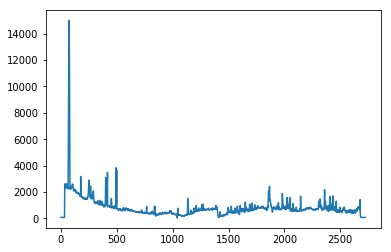

In [14]:
plt.plot(scispect)

In [5]:
stdpath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/telluric/r1081.fits'

stdspec, stdvar, stdpmod, stdpfit, stdprof, stdslcs, b_spec = reduce_standard(stdpath, median_biasframe, norm_flat, image_mask, 30, 0.1)

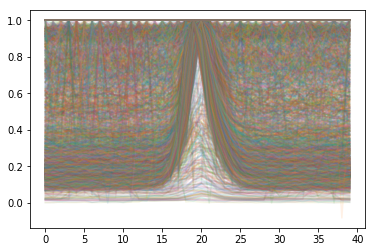

In [16]:
import pandas as pd

norm_sci_slcs = copy.deepcopy(scislcs)

for i in range(len(norm_sci_slcs)):
    norm_sci_slcs[i] = norm_sci_slcs[i] / np.amax(norm_sci_slcs[i])
    
    plt.plot(norm_sci_slcs[i], alpha=0.1)
    
wow = pd.DataFrame(norm_sci_slcs)

wow.to_csv('output.csv', index=False, header=False)


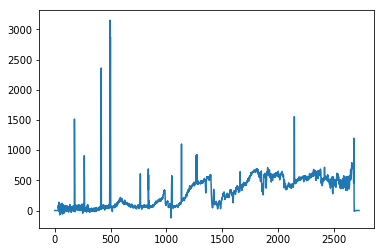

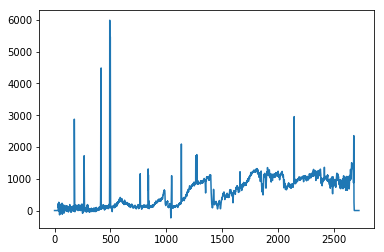

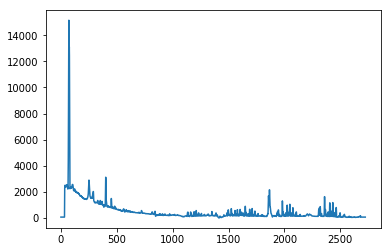

In [9]:
plt.plot(scispect)
plt.show()
plt.plot(scivar)
plt.show()
plt.plot(sci_bkg)
plt.show()

In [8]:
scipath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/science/r1078.fits'
scispect, scivar, scislcs, sciprof, sci_bkg = reduce_science(scipath, median_biasframe, norm_flat, image_mask, 30, stdpfit, stdpmod, 0.4)

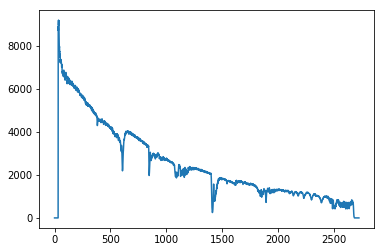

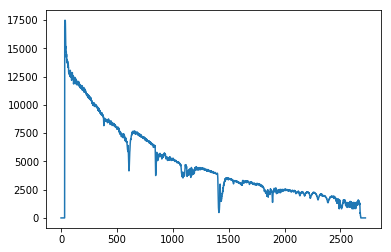

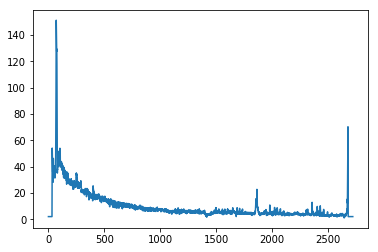

In [6]:
plt.plot(stdspec)
plt.show()
plt.plot(stdvar)
plt.show()
plt.plot(b_spec)
plt.show()

In [4]:
def reduce_standard(image_path, bias_frame, normalized_flat, mask, px_thresh, bkg_percent_thresh):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    poly_slit_model = slit_fit_model(masked_image)
    
    poly_slit_trace = np.poly1d(poly_slit_model)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, poly_slit_trace, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(image_slices)
    
    bsubtracted_image_slices, background_spec = background_subtract(image_slices, spatial_profile, bkg_percent_thresh)
    
    bsubtracted_variance_slices, vbackground_spec = background_subtract(variance_slices, spatial_profile, bkg_percent_thresh)
    
    extraction_weight = weight_function(bsubtracted_image_slices)
    
    spect = extract_spectrum(bsubtracted_image_slices, extraction_weight)
    
    variance = extract_variance(bsubtracted_variance_slices, extraction_weight)
    
    return spect, variance, poly_slit_model, poly_slit_trace, spatial_profile, image_slices, background_spec

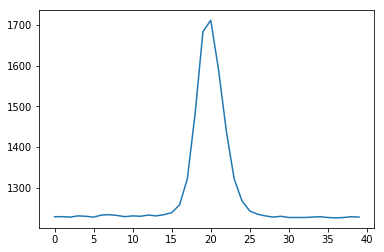

20

In [13]:
sci_im = copy.deepcopy(fits.open(scipath)[0].data)

cent_slc_attempt = gen_cent_slc(sci_im, stdpfit, 20)

plt.plot(np.median(cent_slc_attempt, axis=0))
plt.show()

np.argmax(np.median(cent_slc_attempt, axis=0))

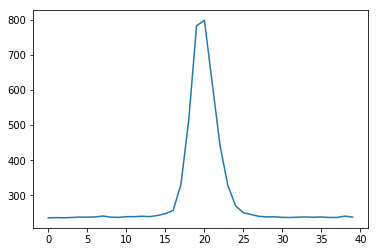

In [48]:
plt.plot(np.median(scislcs, axis=0))

actual_center = np.median(scislcs, axis=0)

In [15]:
stdpmod

array([-4.64332574e-13,  2.65672227e-09, -3.45381551e-06,  1.20520812e-03,
        2.07505869e+02])

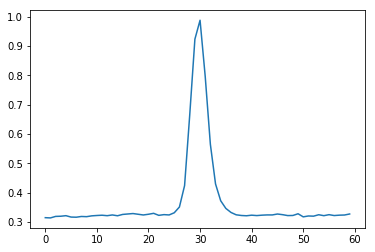

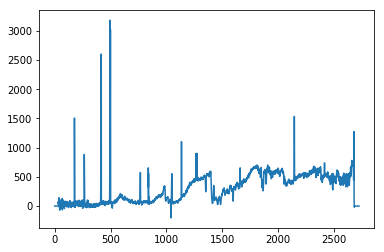

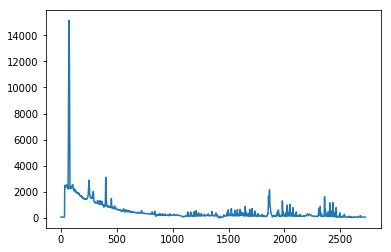

In [13]:
plt.plot(sciprof)
plt.show()

subtr_sci, back_spec = background_subtract(scislcs, sciprof, 0.5)

subtrsciw = weight_function(scislcs)

subtr_sp = extract_spectrum(subtr_sci, subtrsciw)

plt.plot(subtr_sp)
plt.show()

plt.plot(back_spec)
plt.show()

In [5]:
def background_subtract(c_slc, sp_prof, percent_threshold):
        
    cent_slc = copy.deepcopy(c_slc)
    
    #empty lists to hold the background slices and their indices
    background_slices = []
    #background_indices = []
    
    #first pass subtraction

    '''
       deciding which pixels are background
       background pixels are areas where the spatial
       profile is less than the given threshold
    '''
    for i in range(len(cent_slc)):
        
        #setting up empty lists to hold the background pixels and their indices
        background_px = []
        #background_ix = []
        
        #if the pixel value in the slice is less than the threshold, it's background
        for j in range(len(cent_slc[i])):
            if (sp_prof[j] < percent_threshold):
                background_px.append(cent_slc[i][j])
                #background_ix.append(j)
        #appending the pixels and indices from this slice to the list for all slices
        
        #if the list isn't empty, append it, otherwise append zeros
        if background_px != []:
            background_slices.append(background_px)
            #background_indices.append(background_ix)
        else:
            background_slices.append(np.zeros(len(cent_slc[i])))
            #background_indices.append(range(len(cent_slc[i])))
    
    #empty list to hold the background value
    background_vals = []
    
    '''
    #for each slice, find the median of the background
    for i in range(len(background_slices)):
        background_fits.append(np.poly1d(np.polyfit(background_indices[i], background_slices[i], 1)))
    '''
    
    #for each slice, find the median and store it
    for i in range(len(background_slices)):
        background_vals.append(np.median(background_slices[i]))
        
    
    
    '''
    #setting up for iteration
    
    
    bkg_fits = copy.deepcopy( background_fits )
    
    #iterate 10 times
    for n in range(10):
        
        #effectively the same process as above
        bkg_slices = []
        bkg_indices = []
        
        for i in range(len(cent_slc)):
            
            slc_max = np.amax(cent_slc[i])
            bkg_px = []
            bkg_ix = []
            
            #if the pixel value in the slice is less than 10% the difference between the maximum in the slice
            #and the previous background fit, it's also background
            for j in range(len(cent_slc[i])):
                if (np.divide(cent_slc[i][j], slc_max - bkg_fits[i](j)) < 0.1):
                    bkg_px.append(cent_slc[i][j])
                    bkg_ix.append(j)
            if bkg_px != []:
                bkg_slices.append(bkg_px)
                bkg_indices.append(bkg_ix)
                
            else:
                bkg_slices.append(np.zeros(len(cent_slc[i])))
                bkg_indices.append(range(len(cent_slc[i])))
        
        #creating new fits based on the newly selected background
        for i in range(len(bkg_slices)):
            bkg_fits[i] = np.poly1d(np.polyfit(bkg_indices[i], bkg_slices[i], 1))            
        
    '''            
    #the signal is the difference between the centered slices and the background
    signal_slc = copy.deepcopy(cent_slc)
        
    for i in range(len(signal_slc)):
        signal_slc[i] = signal_slc[i] - background_vals[i]
    
    return signal_slc, background_vals


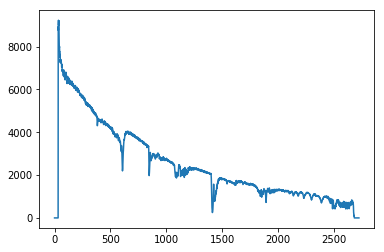

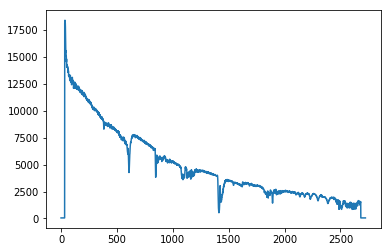

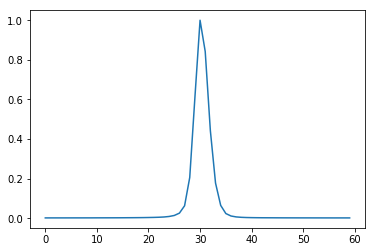

In [9]:
plt.plot(stdspec)
plt.show()

plt.plot(stdvar)
plt.show()

plt.plot(stdprof)
plt.show()

In [39]:
new_mod = copy.deepcopy(stdpmod)

new_mod[4] = new_mod[4] + 100

new_fit = np.poly1d(new_mod)

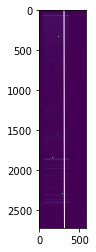

In [40]:
xrange = range(len(sci_im[:,0]))
fig, ax = plt.subplots()
ax.imshow(sci_im)
ax.plot(new_fit(xrange), xrange, color = 'w', linewidth=1)

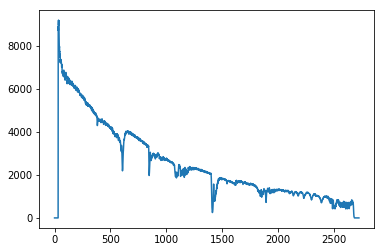

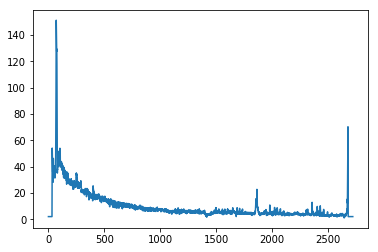

In [11]:
subtr_slcs, back_spec = background_subtract(stdslcs, stdprof, 0.1)

subtrw = weight_function(subtr_slcs)

subtr_spect = extract_spectrum(subtr_slcs, subtrw)

plt.plot(subtr_spect)
plt.show()

plt.plot(back_spec)
plt.show()

In [47]:
    cent_slc = []
    
    for i in range(len(sci_im[:,0])):
        slc = sci_im[i,:]
        
        cent_slc.append(slc[ int(np.around(stdpfit(i) - 10)):int(np.around(stdpfit(i) + 30))])

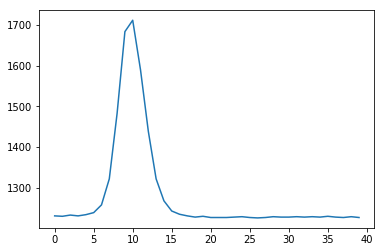

In [48]:
plt.plot(np.median(cent_slc, axis=0))

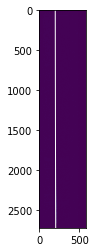

In [66]:
shifted_model = slit_fit_shift(cent_slc, stdpmod, 20)

shifted_poly = np.poly1d(shifted_model)

std_im = copy.deepcopy(fits.open(stdpath)[0].data)

xrange = range(len(std_im[:,0]))
fig, ax = plt.subplots()
ax.imshow(std_im)
ax.plot(shifted_poly(xrange), xrange, color = 'w', linewidth=1)

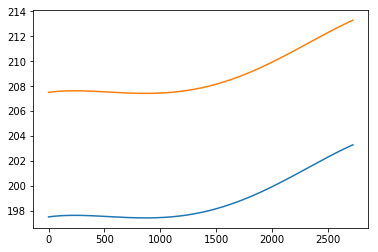

In [67]:
plt.plot(xrange, shifted_poly(xrange))

plt.plot(xrange, stdpfit(xrange))

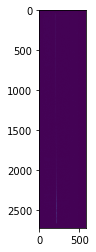

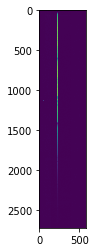

In [24]:
std_im = copy.deepcopy(fits.open(stdpath)[0].data)
shift_im = np.roll(std_im, 20, axis=1)

plt.imshow(std_im)
plt.show()
plt.imshow(shift_im)
plt.show()

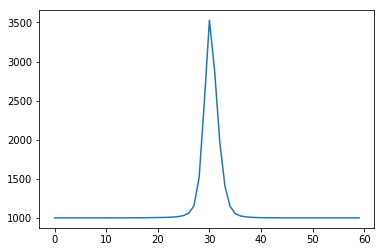

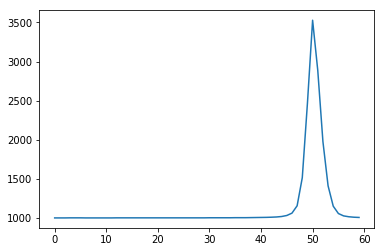

In [27]:
good_slc = gen_cent_slc(std_im, stdpfit, 30)

shift_slc = gen_cent_slc(shift_im, stdpfit, 30)

plt.plot(np.median(good_slc, axis=0))
plt.show()

plt.plot(np.median(shift_slc, axis=0))
plt.show()

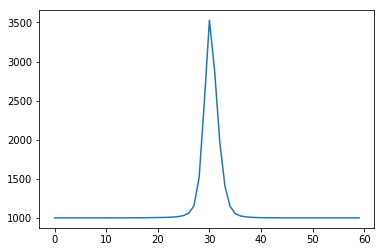

In [32]:
new_mod = slit_fit_shift(shift_slc, stdpmod, 30)
new_fit = np.poly1d(new_mod)

new_slc = gen_cent_slc(shift_im, new_fit, 30)

plt.plot(np.median(new_slc, axis=0))

In [33]:
new_mod

array([-4.64332574e-13,  2.65672227e-09, -3.45381551e-06,  1.20520812e-03,
        2.27505869e+02])